In [11]:
!pip install pydantic
!pip install langgraph
!pip install langchain
!pip install langchain-core
!pip install langchain-community

  Using cached langgraph-0.6.7-py3-none-any.whl.metadata (6.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.66
    Uninstalling langchain-core-0.3.66:
      Successfully uninstalled langchain-core-0.3.66
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [18]:
from typing_extensions import TypedDict
from typing import Literal
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
import random

In [3]:
class State(TypedDict):
    graph_info: str

In [4]:
def start_play(state: State):
    print("Start Play node has been called")
    return {"graph_info": state["graph_info"] + "I am planning to play"}

In [5]:
def cricket(state: State):
    print("Cricket node has been called")
    return {"graph_info": state["graph_info"] + "Cricket"}

In [6]:
def badminton(state: State):
    print("Badminton node has been called")
    return {"graph_info": state["graph_info"] + "Badminton"}

In [8]:
def random_play(state: State)-> Literal["cricket", "badminton"]:
    if random.random() > 0.5:
        return "cricket"
    else:
        return "badminton"

In [15]:
graph = StateGraph(State)

graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("badminton", badminton)

graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)

graph_builder = graph.compile()

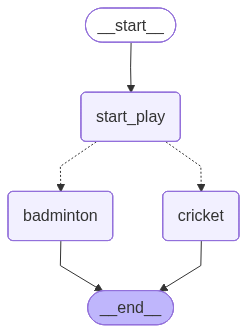

In [16]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [19]:
graph_builder.invoke({"graph_info": "Hi. my name is ali "})

Start Play node has been called
Badminton node has been called


{'graph_info': 'Hi. my name is ali I am planning to playBadminton'}